In [1]:
%%capture
#!pip install wfdb
BASEPATH = '../'
import sys
sys.path.insert(0,'..')

import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from pyecg.utils import reset_seed, plot_spectogram, plot_loss, load_data
from pyecg.utils import integer_mapping, mapping_AAMI
from pyecg.data_info import *
from pyecg.data_handling import DataHandling
from pyecg.data_preprocessing import DataPreprocessing
from pyecg.report import Reports
from pyecg.models.Anomaly_AE_FCN import model_arch 

reset_seed()

# Data

In [2]:
dh = DataHandling(base_path='../data')

x_train, y_train = dh.load_data(load_file_name='DS1_train.dat')
x_val, y_val = dh.load_data(load_file_name='DS1_val.dat')

statReport = dh.report_stats_table([y_train,y_val],['train','val'])
statReport

NameError: name 'DataHandling' is not defined

In [3]:
x_train.shape

(23700, 256)

In [4]:
from data_handling import slice_data
x_train,_ = slice_data(x_train, y_train, ['N'])
x_val,_ = slice_data(x_val, y_val, ['N'])

print(x_train.shape,x_val.shape)

(17729, 256) (20358, 256)


# Train

In [8]:
model = model_arch(input_dim=256)

model.compile(optimizer="Adam", loss="mse", metrics=["acc"])
model_history = model.fit(x_train,
                          x_train,
                          epochs=40,
                          validation_data=(x_val, x_val),
                          batch_size=256,
                          shuffle=True)

Epoch 1/40
70/70 [==============================] - 1s 12ms/step - loss: 0.6109 - acc: 0.2344 - val_loss: 0.5234 - val_acc: 0.4676
Epoch 2/40
70/70 [==============================] - 1s 10ms/step - loss: 0.4660 - acc: 0.3291 - val_loss: 0.4937 - val_acc: 0.4840
Epoch 3/40
70/70 [==============================] - 1s 11ms/step - loss: 0.4436 - acc: 0.3334 - val_loss: 0.4819 - val_acc: 0.6078
Epoch 4/40
70/70 [==============================] - 1s 10ms/step - loss: 0.4311 - acc: 0.3712 - val_loss: 0.4727 - val_acc: 0.6242
Epoch 5/40
70/70 [==============================] - 1s 10ms/step - loss: 0.4256 - acc: 0.4076 - val_loss: 0.4653 - val_acc: 0.6021
Epoch 6/40
70/70 [==============================] - 1s 13ms/step - loss: 0.4208 - acc: 0.4348 - val_loss: 0.4609 - val_acc: 0.6097
Epoch 7/40
70/70 [==============================] - 1s 12ms/step - loss: 0.4165 - acc: 0.4348 - val_loss: 0.4550 - val_acc: 0.5369
Epoch 8/40
70/70 [==============================] - 1s 11ms/step - loss: 0.4153 - a

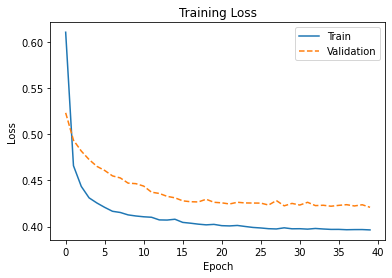

In [9]:
plot_loss(model_history)

In [10]:
import pickle
with open(BASEPATH+'history/EXP1.hist', 'wb') as f:
  pickle.dump(model_history.history, f)


In [11]:
a =model_history.history
min(a['val_loss']), a['val_loss'].index(min(a['val_loss']))

(0.4208572804927826, 39)

# Loading Model

In [12]:
#Load Test Set
x_test, y_test = load_data(file_path = '../data/DS2.dat')
y_true = y_test.copy()
x_test.shape, len(y_test)

File loaded: ../data/DS2.dat


((49693, 256), 49693)

In [14]:
x_test_pred = model.predict(x_test)

In [19]:
_,ind = dh.search_type(x_test, y_test, 1, sym='a')

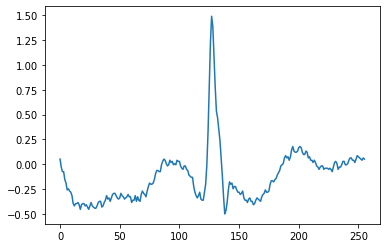

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(0,256),x_test[ind[45]])

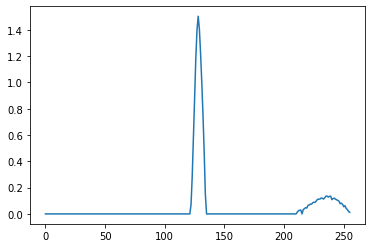

In [21]:
plt.plot(range(0,256),x_test_pred[ind[45]])

In [18]:
_,ind = dh.search_type(x_test, y_test, 1, sym='N')

model.evaluate(x_test[ind], x_test[ind])

1139/1139 [==============================] - 2s 1ms/step - loss: 0.4926 - acc: 0.5263


[0.4925704300403595, 0.5263258814811707]